In [1]:
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
random.seed(42)

In [2]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)


    
 

In [3]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_corrected", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)

data=df
data=pd.get_dummies(data,columns=['26'])
data=data.to_numpy()
x,y=split_sequences(data,3)
print(y.shape)

# target=data['26']
# data=data.drop(['26'],axis=1)
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)



# Model building
n_steps=3

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, config.EXTRACTED_FEATURES), return_sequences=True))
model.add(LSTM(30, activation='relu'))
model.add(Dense(10,activation='softmax'))
# model.add(Embedding(config.EXTRACTED_FEATURES,128))
# model.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))
# model.add(GlobalMaxPool1D())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
#     # model = Sequential()
#     # model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
#     # model.add(LSTM(10))
#     # model.add(Dense(1, activation='sigmoid'))
#     # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# #     model = tf.keras.Sequential([
# #     tf.keras.layers.Embedding(config.EXTRACTED_FEATURES, 64),
# #     tf.keras.layers.LSTM(64),
# #     tf.keras.layers.Dense(1, activation="sigmoid")
# # ])
#     # x_train = pad_sequences(x_train, 300)
#     # x_test = pad_sequences(x_test, 300)
model.summary()
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)

(12258, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             15400     
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
Total params: 25,430
Trainable params: 25,430
Non-trainable params: 0
_________________________________________________________________
(12258, 3, 26)
Epoch 1/100
154/154 [==============================] - 10s 42ms/step - loss: 2.9029 - accuracy: 0.2238 - val_loss: 1.8029 - val_accuracy: 0.3405
Epoch 2/100
154/154 [==============================] - 5s 35ms/step - loss: 2.1691 - accuracy: 0.3904 - val_loss: 1.5936 - val_accuracy: 0.4213


KeyboardInterrupt: 

<AxesSubplot:>

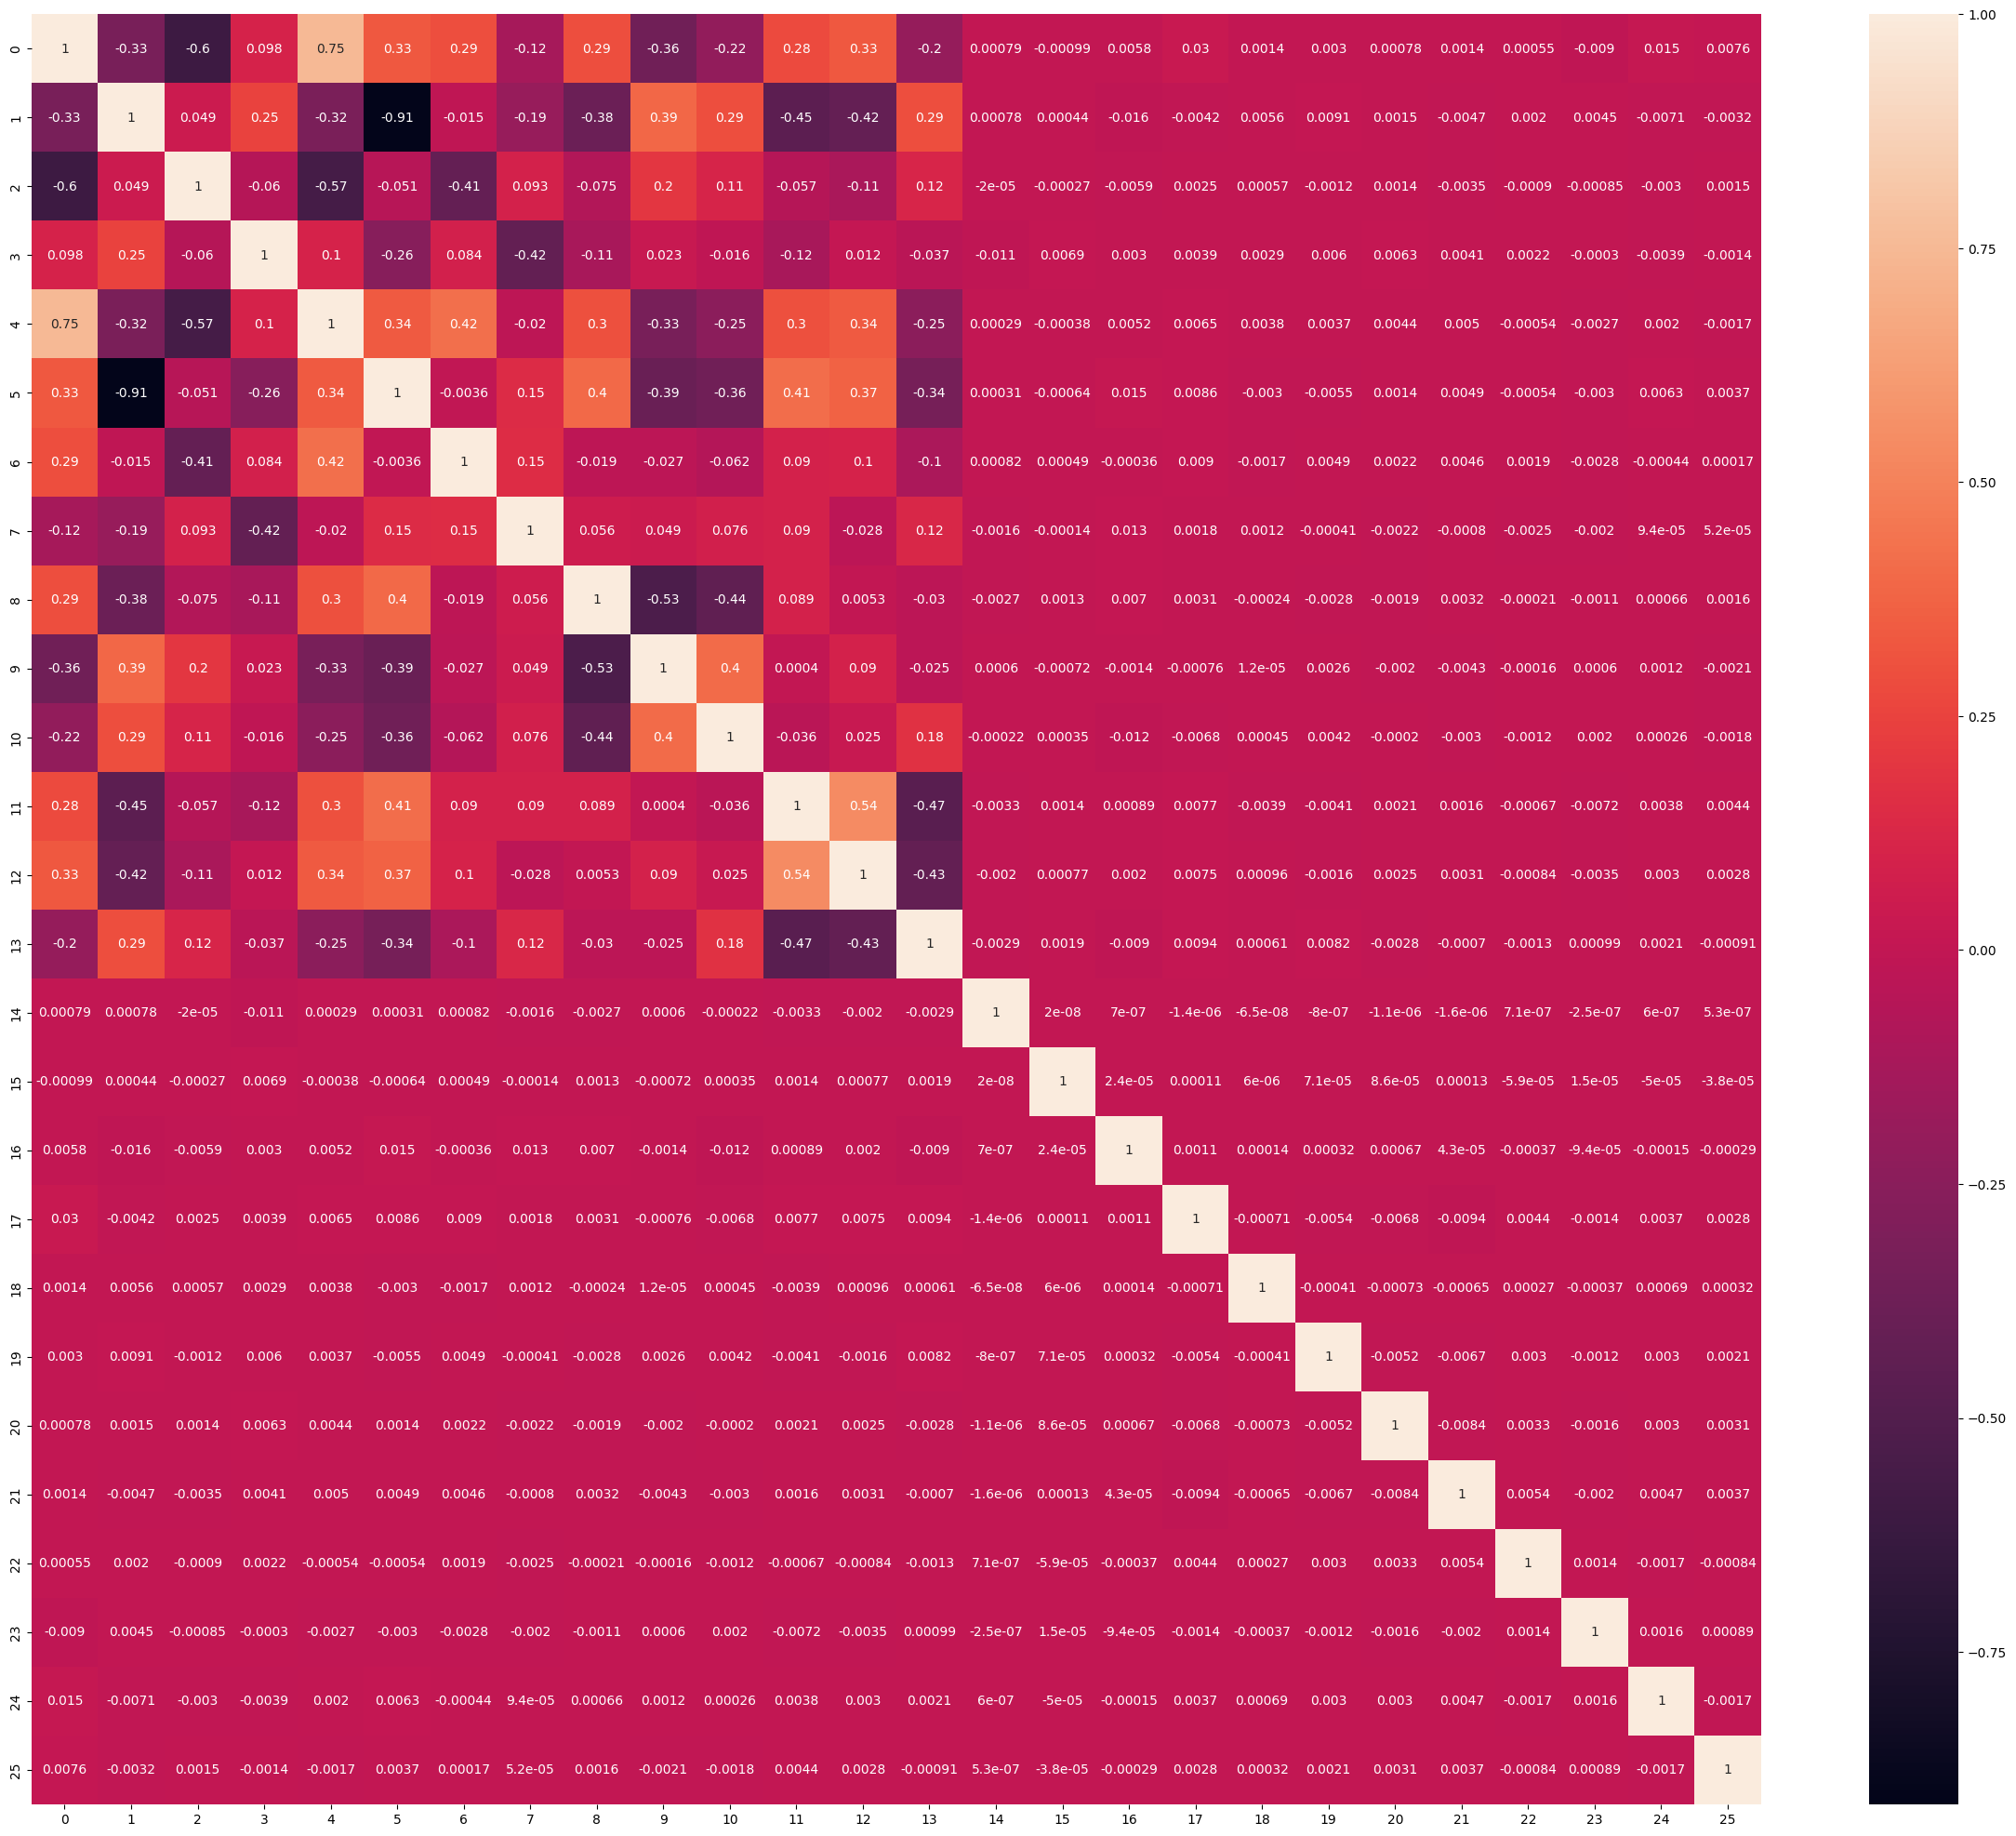

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_corrected", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)

data=df
target=data['26']
data=data.drop(['26'],axis=1)
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)
# data=pd.get_dummies(data,columns=['26'])
# data=data.to_numpy()
# x,y=split_sequences(data,3)

In [57]:
threshold=0.5
df=abs(corr['13'])
result=df[df>0.5]
result
for i in range(27):
    index=str(i)
    df=abs(corr[index])
    result=df[df>0.5]
    print('correlation of feature ',i,'\n',result,'\n')
data=data.drop(['2','4','5','8','11'],axis=1)
data.head()
data.shape


correlation of feature  0 
 0    1.000000
2    0.602575
4    0.749441
Name: 0, dtype: float64 

correlation of feature  1 
 1    1.000000
5    0.913224
Name: 1, dtype: float64 

correlation of feature  2 
 0    0.602575
2    1.000000
4    0.566074
Name: 2, dtype: float64 

correlation of feature  3 
 3    1.0
Name: 3, dtype: float64 

correlation of feature  4 
 0    0.749441
2    0.566074
4    1.000000
Name: 4, dtype: float64 

correlation of feature  5 
 1    0.913224
5    1.000000
Name: 5, dtype: float64 

correlation of feature  6 
 6    1.0
Name: 6, dtype: float64 

correlation of feature  7 
 7    1.0
Name: 7, dtype: float64 

correlation of feature  8 
 8    1.000000
9    0.527387
Name: 8, dtype: float64 

correlation of feature  9 
 8    0.527387
9    1.000000
Name: 9, dtype: float64 

correlation of feature  10 
 10    1.0
Name: 10, dtype: float64 

correlation of feature  11 
 11    1.000000
12    0.538213
Name: 11, dtype: float64 

correlation of feature  12 
 11    0.538213

KeyError: '26'

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_corrected", "*", "*.csv"))
# print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
df=pd.read_csv(r"D:\Research_Project\My_project_22\input\preprocessed_corrected\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")

data=df
target=data['26']
print(data.shape)
data=data.drop(['26'],axis=1)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
print(feat_importances)

# lst=list(feat_importances.nlargest(10).index)
# print(lst)
# for i in range(26):
#     i=str(i)
#     if i not in lst:
        
#         print(i)
#         data=data.drop(i,axis=1)
# data.head()

# plt.show()
# for i in range(54):
#     if

(37, 27)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
dtype: float64


In [80]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score as acc

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import warnings

warnings. filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :15], sequences[end_ix-1, 15:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)

# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)

data=df
print("data shape\n",data.shape)
data=pd.get_dummies(data,columns=['54'])
print("data ",type(data))
# data=data.to_numpy()
# x,y=split_sequences(data,5)
# print(y.shape)
x=data.iloc[:,:54]
y=data.iloc[:,54:]
print(x.shape)
print(y.shape)

# target=data['26']
# data=data.drop(['26'],axis=1)
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)

# Build Linear Regression Model to use in feature selection

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)
# Build step forward feature selection

sfs1 = sfs(LR,k_features = 10,forward=True,floating=False, scoring='r2',verbose=2,cv=5)
# Perform SFFS
print(x_train.shape)
print(y_train.shape)

sfsl = sfs1.fit(x_train, y_train)

data shape
 (12260, 55)
data  <class 'pandas.core.frame.DataFrame'>
(12260, 54)
(12260, 10)
(9808, 54)
(9808, 10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    2.4s finished

[2022-11-05 10:59:05] Features: 1/10 -- score: 0.01519270955858516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    3.1s finished

[2022-11-05 10:59:08] Features: 2/10 -- score: 0.033529546049166595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    2.9s finished

[2022-11-05 10:59:11] Features: 3/10 -- score: 0.05136432525910665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)

# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)

data=df
x=data.drop('54',axis=1)

def cal_vif(x):
    thresh = 5
    output= pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no ",1)
        print(vif)
        a = np.argmax(vif)
        print("Hiax vif is for variable no : ",a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            Vif = [variance_inflation_factor(output.values,3) for j in range(output.shape[1])]
        elif(1>1):
            output = output.drop(output . columns([a], axis=1))
            Vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)
selected_features = cal_vif(x)
selected_features. head()

Iteration no  1
[492368444.5295557, 2352456117.945887, 7998905.898510576, 743292.6354291055, 315658.8090674437, 1909970.7904263604, 5022920.817064637, 524457.7982904911, 795114.5355566215, 736762.0325101836, 1820866.5328672496, 40150331.13412865, 2495745.7985639805, 5742530.992016823, 4487105.963653253, 19530128.162640966, 838222.7712723378, 4301005.930048703, 4220193.754419332, 3279200330.694592, 3114261.609863442, 335099.0118010834, 974177.8201758078, 146141.68356812824, 320444.71434486646, 43032.262874990745, 16046.709358171209, 146180.17670796515, 519842.6565209421, 296961.7113843979, 1069105.81532015, 166392.7023811264, 113422.70752869158, 133127.58508004155, 317639.48795375024, 748900.1372234809, 527561.4212654185, 381121.6892979512, 1224746.3317636186, 54.67046055826127, 10.350382324367633, 14.014342134565283, 4.577142460987231, 8.086534021582018, 10.02588269855387, 13.36685897719312, 2.4375068259763153, 5.871294429283575, 2.0193810717206095, 2.2915242543769456, 2.45245953552855

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.324883,0.314224,0.475169,0.257537,0.224666,0.380845,0.480537,0.253687,0.224452,0.390823,...,1.597459,-0.140846,1.246003,0.169821,0.162107,-0.027582,0.081955,0.113375,0.031990,0.131282
1,0.322438,0.312178,0.470942,0.260437,0.229644,0.384718,0.450586,0.252057,0.222488,0.390271,...,1.614270,-0.147442,1.296214,0.211502,0.157114,-0.009114,0.106628,0.088090,0.029938,0.127583
2,0.321594,0.311465,0.469381,0.261410,0.231567,0.386289,0.442863,0.251537,0.221754,0.390644,...,1.619788,-0.148863,1.306293,0.224825,0.156264,-0.002401,0.115748,0.079567,0.029953,0.126045
3,0.321504,0.311379,0.469090,0.261484,0.231913,0.386717,0.444212,0.251446,0.221688,0.390763,...,1.619716,-0.148812,1.302433,0.224631,0.155941,-0.001148,0.116238,0.078291,0.030147,0.125562
4,0.321446,0.311360,0.469092,0.261522,0.232146,0.387123,0.445079,0.251438,0.222014,0.390721,...,1.619620,-0.149545,1.296863,0.226248,0.155132,-0.000888,0.115037,0.077394,0.030157,0.125631


Best alpha using built-in LassoCV: 0.454550
Best score using built-in LassoCV: 0.010238
Lasso picked 4 variables and eliminated the other 50 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

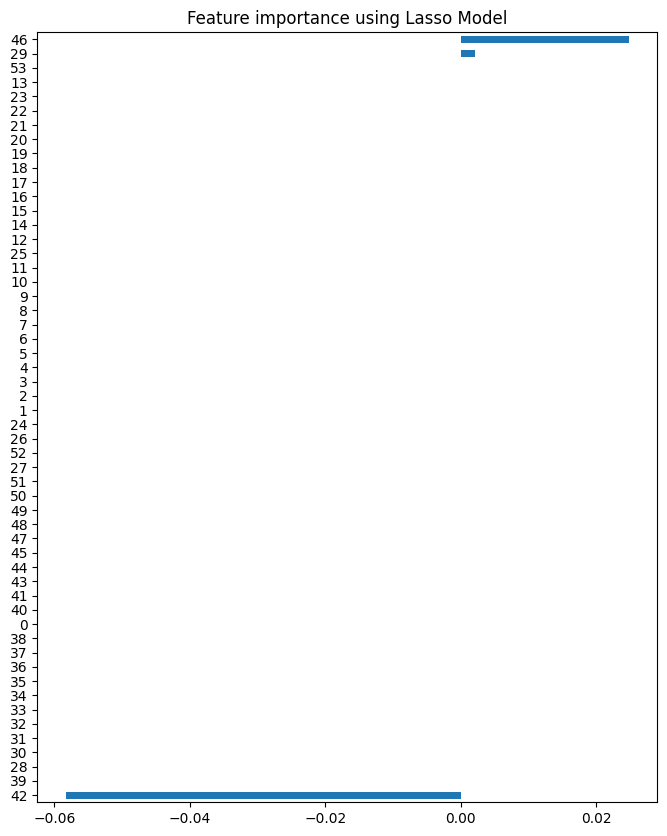

In [85]:

raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)

# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)

data=df
X=data.drop('54',axis=1)
y=data['54']
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg. fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +
str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [67]:
feat_cols = list(sfs1.k_feature_idx )
print(feat_cols)

AttributeError: 'SequentialFeatureSelector' object has no attribute 'k_feature_idx'